Feature indices:
0: sepal length (cm)
1: sepal width (cm)
2: petal length (cm)
3: petal width (cm)



Select the first feature index:  0
Select the second feature index:  1



Class indices:
0: setosa
1: versicolor
2: virginica



Select the first class index:  0
Select the second class index:  1



Initial training accuracy: 100.00%


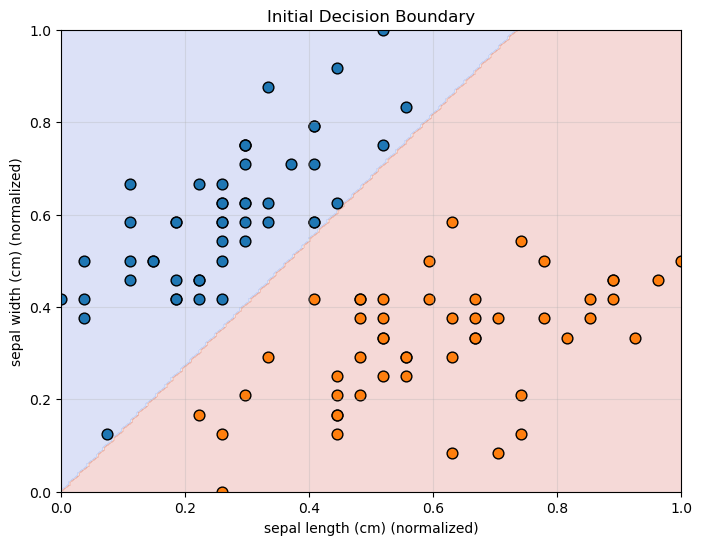


Do you want to add a new point? (yes/no):  yes
Enter sepal length (cm) value (range ~4.3-7.0):  5
Enter sepal width (cm) value (range ~2.0-4.4):  4
Enter class (0 or 1):  0


Updated training accuracy after adding point: 100.00%


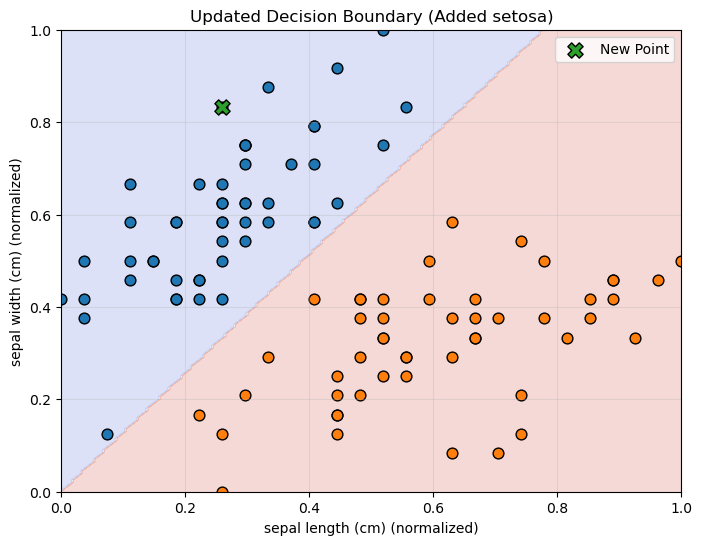


Do you want to add a new point? (yes/no):  yes
Enter sepal length (cm) value (range ~4.3-7.0):  3
Enter sepal width (cm) value (range ~2.0-4.4):  3
Enter class (0 or 1):  0


Updated training accuracy after adding point: 100.00%


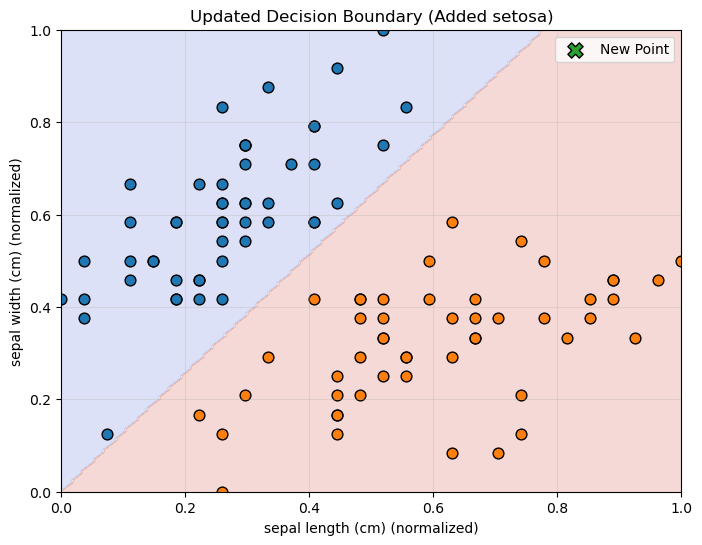


Do you want to add a new point? (yes/no):  no



Final weights: [ 0.40740741 -0.31666667]
Range of weights: min=-0.3167, max=0.4074


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# === Load data ===
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# === User selects features ===
print("Feature indices:")
for idx, feature in enumerate(feature_names):
    print(f"{idx}: {feature}")

feat1 = int(input("\nSelect the first feature index: "))
feat2 = int(input("Select the second feature index: "))

# === User selects classes ===
print("\nClass indices:")
for idx, target in enumerate(target_names):
    print(f"{idx}: {target}")

class1 = int(input("\nSelect the first class index: "))
class2 = int(input("Select the second class index: "))

# === Filter data for selected classes and features ===
selected_indices = (y == class1) | (y == class2)
X_selected = X[selected_indices][:, [feat1, feat2]]
y_selected = y[selected_indices]
y_selected = np.where(y_selected == class1, 0, 1)  # map class1 -> 0, class2 -> 1

# === Normalize features ===
X_min = X_selected.min(axis=0)
X_max = X_selected.max(axis=0)
X_norm = (X_selected - X_min) / (X_max - X_min)

# === Perceptron implementation ===
class Perceptron:
    def __init__(self, lr=0.1, n_epochs=20):
        self.lr = lr
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = 0

    def activation(self, z):
        return 1 if z >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_epochs):
            for i in range(n_samples):
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)
                error = y[i] - y_pred
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error

    def predict(self, X):
        return np.array([self.activation(np.dot(x, self.weights) + self.bias) for x in X])

    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

# === Plot function with updated colors ===
def plot_decision_boundary(X, y, model, title, new_point=None):
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

    for i in range(len(X)):
        color = '#1f77b4' if y[i] == 0 else '#ff7f0e'
        plt.scatter(X[i][0], X[i][1], c=color, edgecolor='k', s=60)

    if new_point is not None:
        plt.scatter(new_point[0], new_point[1], c='#2ca02c', edgecolor='black',
                    s=120, marker='X', label='New Point')

    plt.xlabel(feature_names[feat1] + " (normalized)")
    plt.ylabel(feature_names[feat2] + " (normalized)")
    plt.title(title)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)

    if new_point is not None:
        plt.legend()

    plt.show()

# === Initialize Perceptron ===
model = Perceptron(lr=0.1, n_epochs=15)
model.fit(X_norm, y_selected)

# Print initial accuracy
initial_acc = model.score(X_norm, y_selected)
print(f"\nInitial training accuracy: {initial_acc * 100:.2f}%")

# Initial plot
plot_decision_boundary(X_norm, y_selected, model, "Initial Decision Boundary")

# === Add new points interactively with error handling ===
while True:
    while True:  # Input validation loop
        add = input("\nDo you want to add a new point? (yes/no): ").strip().lower()
        if add in ['yes', 'no']:
            break
        print("Invalid input. Please enter either 'yes' or 'no'.")

    if add != 'yes':
        break

    # Get user input for new data point
    while True:  # Feature value validation
        try:
            x_val = float(input(f"Enter {feature_names[feat1]} value (range ~{X_min[0]:.1f}-{X_max[0]:.1f}): "))
            y_val = float(input(f"Enter {feature_names[feat2]} value (range ~{X_min[1]:.1f}-{X_max[1]:.1f}): "))
            break
        except ValueError:
            print("Invalid input. Please enter numeric values.")

    while True:  # Class validation
        try:
            class_val = int(input(f"Enter class ({class1} or {class2}): "))
            if class_val in [class1, class2]:
                break
            else:
                print(f"Invalid class. Please enter either {class1} or {class2}.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    # Normalize new point
    x_val_norm = (x_val - X_min[0]) / (X_max[0] - X_min[0])
    y_val_norm = (y_val - X_min[1]) / (X_max[1] - X_min[1])

    # Add to dataset
    X_norm = np.vstack([X_norm, [x_val_norm, y_val_norm]])
    y_selected = np.append(y_selected, 0 if class_val == class1 else 1)

    # Retrain the model
    model.fit(X_norm, y_selected)

    # Print updated accuracy
    updated_acc = model.score(X_norm, y_selected)
    print(f"Updated training accuracy after adding point: {updated_acc * 100:.2f}%")

    # Plot updated decision boundary
    plot_decision_boundary(X_norm, y_selected, model,
                           f"Updated Decision Boundary (Added {target_names[class_val]})",
                           new_point=[x_val_norm, y_val_norm])

# print(f"Final weights: {model.weights}")
# print(f"Final bias: {model.bias}")
print(f"\nFinal weights: {model.weights}")
print(f"Range of weights: min={model.weights.min():.4f}, max={model.weights.max():.4f}")



In [4]:
a=[1,2]
b=[3,4]
x.plot(a,b)

NameError: name 'x' is not defined